In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import random
import seaborn as sns  

In [2]:
# 파일읽기
train = pd.read_csv('./data/Train.csv', index_col = 'ID')
test = pd.read_csv('./data/test.csv', index_col = 'ID')

In [3]:
test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
ID,,,,,,,,,,
7000,F,Ship,3.0,1,274,NaN,high,M,NaN,4352
7001,F,Ship,3.0,4,136,2.0,medium,F,NaN,1056
7002,A,Flight,NaN,5,140,3.0,low,F,7.0,5383
7003,C,Ship,NaN,1,291,4.0,low,F,NaN,1880
7004,F,?,4.0,2,147,3.0,low,F,5.0,5174
...,...,...,...,...,...,...,...,...,...,...
10995,A,?,4.0,1,204,4.0,?,F,NaN,1667
10996,C,Ship,NaN,3,195,2.0,medium,M,NaN,3869
10997,B,Flight,NaN,3,206,2.0,medium,M,7.0,4531


In [4]:
train.columns=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N']

In [5]:
test.columns=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'
             ]

In [6]:
# 데이터 확인하기
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------       

- ID
- Warehouse_block 
- Mode_of_Shipment
- Customer_care_calls
- Customer_rating
- Cost_of_the_Product
- Prior_purchases
- Product_importance
- Gender
- Discount_offered
- Weight_in_gms
- Reached.on.Time_Y.N

In [7]:
# 오타 수정 및 공백 제거
train['Mode_of_Shipment'].replace(' Ship', 'Ship', inplace = True)
train['Mode_of_Shipment'].replace(' Flight', 'Flight', inplace = True)
train['Mode_of_Shipment'].replace(' Road', 'Road', inplace = True)
train['Mode_of_Shipment'].replace(' Shipzk', 'Ship', inplace = True)
train['Mode_of_Shipment'].replace(' Flightzk', 'Flight', inplace = True)
train['Mode_of_Shipment'].replace(' Roadzk', 'Road', inplace = True)
train['Mode_of_Shipment'].replace(' Roadzk', 'Road', inplace = True)

In [8]:
test['Mode_of_Shipment'].replace(' Ship', 'Ship', inplace = True)
test['Mode_of_Shipment'].replace(' Flight', 'Flight', inplace = True)
test['Mode_of_Shipment'].replace(' Road', 'Road', inplace = True)
test['Mode_of_Shipment'].replace(' Shipzk', 'Ship', inplace = True)
test['Mode_of_Shipment'].replace(' Flightzk', 'Flight', inplace = True)
test['Mode_of_Shipment'].replace(' Roadzk', 'Road', inplace = True)
test['Mode_of_Shipment'].replace(' Roadzk', 'Road', inplace = True)

In [9]:
train['Product_importance'].replace("loww" , 0, inplace=True)
train['Product_importance'].replace("mediumm" , 1, inplace=True)
train['Product_importance'].replace("highh" , 2, inplace=True)
train['Product_importance'].replace("low" , 0, inplace=True)
train['Product_importance'].replace("medium" , 1, inplace=True)
train['Product_importance'].replace("high" , 2, inplace=True)
# train['Product_importance'].replace("?", np.nan, inplace=True)
train['Product_importance'].unique()

array([0, 1, 2, '?'], dtype=object)

In [10]:
test['Product_importance'].replace("loww" , 0, inplace=True)
test['Product_importance'].replace("mediumm" , 1, inplace=True)
test['Product_importance'].replace("highh" , 2, inplace=True)
test['Product_importance'].replace("low" , 0, inplace=True)
test['Product_importance'].replace("medium" , 1, inplace=True)
test['Product_importance'].replace("high" , 2, inplace=True)
# test['Product_importance'].replace("?", np.nan, inplace=True)
test['Product_importance'].unique()

array([2, 1, 0, '?'], dtype=object)

In [11]:
# 범주형 데이터를 수치형 데이터로 변환
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace('Ship', 0).replace('Flight', 1).replace('Road', 2)

In [12]:
# 범주형 데이터를 수치형 데이터로 변환
test['Mode_of_Shipment'] = test['Mode_of_Shipment'].replace('Ship', 0).replace('Flight', 1).replace('Road', 2)

In [13]:
train['Mode_of_Shipment'].unique()

array([0, 1, 2, '?'], dtype=object)

In [14]:
for i in range(6999):
    if train['Mode_of_Shipment'].iloc[i] == '?':
        train['Mode_of_Shipment'].iloc[i] = random.randint(3, 8)

train['Mode_of_Shipment'].unique()

C:\Users\user04\AppData\Local\Temp\ipykernel_556\3460975073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Mode_of_Shipment'].iloc[i] = random.randint(3, 8)


array([0, 1, 2, 6, 3, 5, 8, 7, 4], dtype=object)

In [15]:
for i in range(4000):
    if test['Mode_of_Shipment'].iloc[i] == '?':
        test['Mode_of_Shipment'].iloc[i] = random.randint(3, 8)

test['Mode_of_Shipment'].unique()

C:\Users\user04\AppData\Local\Temp\ipykernel_556\2738221104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Mode_of_Shipment'].iloc[i] = random.randint(3, 8)


array([0, 1, 7, 2, 4, 8, 6, 5, 3], dtype=object)

In [16]:
train['Mode_of_Shipment'].replace(3, 0, inplace = True)
train['Mode_of_Shipment'].replace(4, 0, inplace = True)
train['Mode_of_Shipment'].replace(5, 0, inplace = True)
train['Mode_of_Shipment'].replace(6, 0, inplace = True)
train['Mode_of_Shipment'].replace(7, 1, inplace = True)
train['Mode_of_Shipment'].replace(8, 2, inplace = True)

In [17]:
test['Mode_of_Shipment'].replace(3, 0, inplace = True)
test['Mode_of_Shipment'].replace(4, 0, inplace = True)
test['Mode_of_Shipment'].replace(5, 0, inplace = True)
test['Mode_of_Shipment'].replace(6, 0, inplace = True)
test['Mode_of_Shipment'].replace(7, 1, inplace = True)
test['Mode_of_Shipment'].replace(8, 2, inplace = True)

In [18]:
for i in range(6999):
    if train['Product_importance'].iloc[i] == '?':
        train['Product_importance'].iloc[i] = random.randint(3, 8)
train['Product_importance'].unique()

C:\Users\user04\AppData\Local\Temp\ipykernel_556\3216636699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Product_importance'].iloc[i] = random.randint(3, 8)


array([0, 1, 2, 3, 5, 7, 6, 8, 4], dtype=object)

In [19]:
for i in range(4000):
    if test['Product_importance'].iloc[i] == '?':
        test['Product_importance'].iloc[i] = random.randint(3, 8)
test['Product_importance'].unique()

C:\Users\user04\AppData\Local\Temp\ipykernel_556\1317042086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Product_importance'].iloc[i] = random.randint(3, 8)


array([2, 1, 0, 7, 8, 4, 6, 5, 3], dtype=object)

In [20]:
train['Product_importance'].replace(3, 0, inplace = True)
train['Product_importance'].replace(4, 0, inplace = True)
train['Product_importance'].replace(5, 0, inplace = True)
train['Product_importance'].replace(6, 1, inplace = True)
train['Product_importance'].replace(7, 1, inplace = True)
train['Product_importance'].replace(8, 2, inplace = True)

In [21]:
test['Product_importance'].replace(3, 0, inplace = True)
test['Product_importance'].replace(4, 0, inplace = True)
test['Product_importance'].replace(5, 0, inplace = True)
test['Product_importance'].replace(6, 1, inplace = True)
test['Product_importance'].replace(7, 1, inplace = True)
test['Product_importance'].replace(8, 2, inplace = True)

In [22]:
# train['Weight_in_gms'].value_counts()
train[train['Weight_in_gms'] == '?']

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
48,D,0,NaN,2,281,4.0,2,F,5.0,?,1
66,D,0,4.0,1,249,6.0,1,M,NaN,?,1
68,A,0,3.0,2,213,6.0,1,M,NaN,?,1
83,A,0,NaN,1,105,6.0,1,M,62.0,?,1
91,C,0,NaN,2,189,6.0,0,M,NaN,?,0
...,...,...,...,...,...,...,...,...,...,...,...
6890,D,0,7.0,5,282,5.0,0,M,NaN,?,1
6915,A,0,5.0,4,157,4.0,0,M,NaN,?,1
6946,D,0,2.0,2,219,3.0,0,F,NaN,?,1


In [23]:
train['Weight_in_gms'].replace('?', np.nan, inplace = True)

In [24]:
test['Weight_in_gms'].replace('?', np.nan, inplace = True)

In [25]:
med_gms =  train['Weight_in_gms'].median()

In [26]:
med_gms =  test['Weight_in_gms'].median()

In [27]:
train['Weight_in_gms'].replace(np.nan, med_gms, inplace = True)

In [28]:
test['Weight_in_gms'].replace(np.nan, med_gms, inplace = True)

In [29]:
train['Weight_in_gms'].unique()

array(['1339', '1082', '4971', ..., '4075', '2486', '1480'], dtype=object)

In [30]:
# 타입변경
train['Weight_in_gms'].astype(float)

ID
1       1339.0
2       1082.0
3       4971.0
4       5640.0
5       4944.0
         ...  
6995    1783.0
6996    5208.0
6997    1787.0
6998    4719.0
6999    5097.0
Name: Weight_in_gms, Length: 6999, dtype: float64

In [31]:
test['Weight_in_gms'].astype(float)

ID
7000     4352.0
7001     1056.0
7002     5383.0
7003     1880.0
7004     5174.0
          ...  
10995    1667.0
10996    3869.0
10997    4531.0
10998    1869.0
10999    1308.0
Name: Weight_in_gms, Length: 4000, dtype: float64

In [32]:
train.drop(['Discount_offered'], axis = 1, inplace=True)
train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,
1,C,0,2.0,2,135,3.0,0,M,1339,1
2,F,1,5.0,3,225,5.0,0,F,1082,0
3,F,0,3.0,1,229,3.0,0,M,4971,1
4,F,0,3.0,2,228,NaN,1,M,5640,0
5,D,1,NaN,1,195,6.0,2,F,4944,1
...,...,...,...,...,...,...,...,...,...,...
6995,D,0,4.0,2,232,5.0,1,F,1783,0
6996,F,0,3.0,5,228,2.0,1,F,5208,0
6997,D,0,NaN,1,300,5.0,0,F,1787,0


In [33]:
test.drop(['Discount_offered'], axis = 1, inplace=True)
test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Weight_in_gms
ID,,,,,,,,,
7000,F,0,3.0,1,274,NaN,2,M,4352
7001,F,0,3.0,4,136,2.0,1,F,1056
7002,A,1,NaN,5,140,3.0,0,F,5383
7003,C,0,NaN,1,291,4.0,0,F,1880
7004,F,1,4.0,2,147,3.0,0,F,5174
...,...,...,...,...,...,...,...,...,...
10995,A,0,4.0,1,204,4.0,1,F,1667
10996,C,0,NaN,3,195,2.0,1,M,3869
10997,B,1,NaN,3,206,2.0,1,M,4531


In [34]:
train.drop(['Gender'], axis = 1, inplace=True)
train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,
1,C,0,2.0,2,135,3.0,0,1339,1
2,F,1,5.0,3,225,5.0,0,1082,0
3,F,0,3.0,1,229,3.0,0,4971,1
4,F,0,3.0,2,228,NaN,1,5640,0
5,D,1,NaN,1,195,6.0,2,4944,1
...,...,...,...,...,...,...,...,...,...
6995,D,0,4.0,2,232,5.0,1,1783,0
6996,F,0,3.0,5,228,2.0,1,5208,0
6997,D,0,NaN,1,300,5.0,0,1787,0


In [35]:
test.drop(['Gender'], axis = 1, inplace=True)
test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Weight_in_gms
ID,,,,,,,,
7000,F,0,3.0,1,274,NaN,2,4352
7001,F,0,3.0,4,136,2.0,1,1056
7002,A,1,NaN,5,140,3.0,0,5383
7003,C,0,NaN,1,291,4.0,0,1880
7004,F,1,4.0,2,147,3.0,0,5174
...,...,...,...,...,...,...,...,...
10995,A,0,4.0,1,204,4.0,1,1667
10996,C,0,NaN,3,195,2.0,1,3869
10997,B,1,NaN,3,206,2.0,1,4531


In [36]:
train.drop(['Warehouse_block'], axis = 1, inplace=True)
train

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,
1,0,2.0,2,135,3.0,0,1339,1
2,1,5.0,3,225,5.0,0,1082,0
3,0,3.0,1,229,3.0,0,4971,1
4,0,3.0,2,228,NaN,1,5640,0
5,1,NaN,1,195,6.0,2,4944,1
...,...,...,...,...,...,...,...,...
6995,0,4.0,2,232,5.0,1,1783,0
6996,0,3.0,5,228,2.0,1,5208,0
6997,0,NaN,1,300,5.0,0,1787,0


In [37]:
test.drop(['Warehouse_block'], axis = 1, inplace=True)
test

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Weight_in_gms
ID,,,,,,,
7000,0,3.0,1,274,NaN,2,4352
7001,0,3.0,4,136,2.0,1,1056
7002,1,NaN,5,140,3.0,0,5383
7003,0,NaN,1,291,4.0,0,1880
7004,1,4.0,2,147,3.0,0,5174
...,...,...,...,...,...,...,...
10995,0,4.0,1,204,4.0,1,1667
10996,0,NaN,3,195,2.0,1,3869
10997,1,NaN,3,206,2.0,1,4531


In [38]:
train['Prior_purchases'].replace(np.nan, 0, inplace = True)

In [39]:
test['Prior_purchases'].replace(np.nan, 0, inplace = True)

(array([ 287.,    0., 1620.,    0., 1756.,    0., 1147.,    0.,  496.,
         117.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <BarContainer object of 10 artists>)

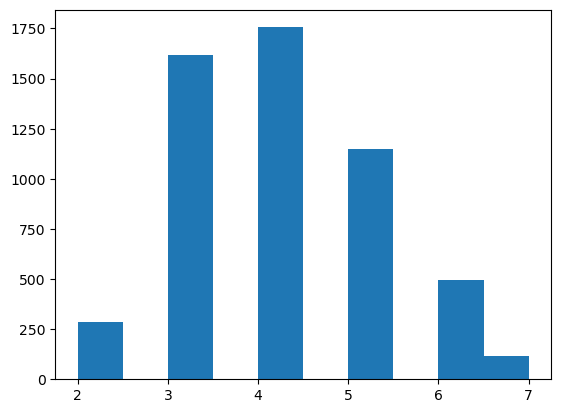

In [40]:
plt.hist(train['Customer_care_calls'])

In [41]:
train['Customer_care_calls'].replace(np.nan, 4, inplace = True)

In [42]:
test['Customer_care_calls'].replace(np.nan, 4, inplace = True)

(array([ 287.,    0., 1620.,    0., 3332.,    0., 1147.,    0.,  496.,
         117.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <BarContainer object of 10 artists>)

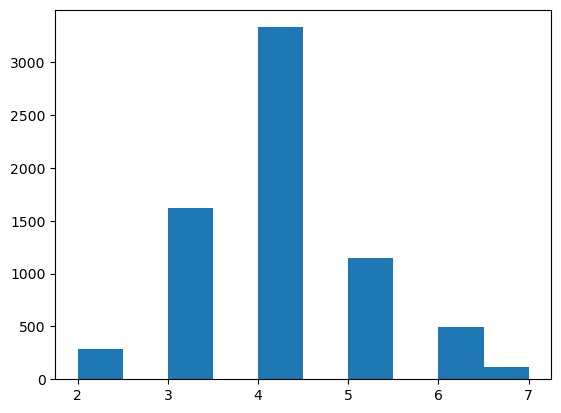

In [43]:
plt.hist(train['Customer_care_calls'])

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
X_train = train.drop('Reached.on.Time_Y.N', axis=1)
y_train = train['Reached.on.Time_Y.N']
X_test = test

In [46]:
# 그리드 서치 모듈 불러오기
from sklearn.model_selection import GridSearchCV

In [47]:
tree = DecisionTreeClassifier()

In [48]:
#하이퍼 파라미터 담아주기
param_tree = {
    'max_depth' : range(1, 6),
    'min_samples_split' : range(1, 100, 10),
    'min_samples_leaf' : range(1,101, 10),
    'max_leaf_nodes' : range(1, 51, 10)
}

In [49]:
# 그리드 서치 객체 만들기
# GridSearchCV(모델, 하이퍼 파리미터 목록, cv=?)
grid_search_tree = GridSearchCV(tree,
                               param_tree,
                               cv = 5)
grid_search_tree

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 6),
                         'max_leaf_nodes': range(1, 51, 10),
                         'min_samples_leaf': range(1, 101, 10),
                         'min_samples_split': range(1, 100, 10)})

In [50]:
# 그리드 서치 학습하기
grid_search_tree.fit(X_train, y_train)

C:\Users\user04\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2500 fits failed out of a total of 12500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user04\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user04\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\user04\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\user04\anaconda3\lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 6),
                         'max_leaf_nodes': range(1, 51, 10),
                         'min_samples_leaf': range(1, 101, 10),
                         'min_samples_split': range(1, 100, 10)})

In [51]:
# 최적의 하이퍼 파라미터 값을 확인해보기 : best_params_
grid_search_tree.best_params_

{'max_depth': 3,
 'max_leaf_nodes': 11,
 'min_samples_leaf': 61,
 'min_samples_split': 1}

In [52]:
# 최고의 파라미터를 사용한 교차 검증 점수 : best_score_
grid_search_tree.best_score_

0.6775291534769734

In [53]:
# 최고의 하이퍼 파라미터를 이용해서 모델을 만드는 방법(ver 1)
best_tree = DecisionTreeClassifier(max_depth = 4,
                                  max_leaf_nodes = 11,
                                  min_samples_leaf=1,
                                  min_samples_split=1)

In [54]:
# 최고의 하이퍼 파라미터를 이용해서 모델을 만드는 방법(ver2)
# 최고 성능의 모델 뽑아보기 : Best_estimator_
grid_search_tree.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=11, min_samples_leaf=61,
                       min_samples_split=1)

In [55]:
best_tree = grid_search_tree.best_estimator_

In [56]:
best_tree

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=11, min_samples_leaf=61,
                       min_samples_split=1)

In [57]:
# 모델학습
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=11, min_samples_leaf=61,
                       min_samples_split=1)

In [58]:
# 모델예측
pre = best_tree.predict(X_test)
pre

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# tree_pj01 = DecisionTreeClassifier(max_depth=4)

In [ ]:
# tree_pj01.fit(X_train, y_train)

In [ ]:
# pre = tree_pj01.predict(X_test)
# pre

In [ ]:
# from sklearn.model_selection import cross_val_score

In [ ]:
# result = 0
# result_i = 0
# for i in range(3, 51, 2):
#     rs = cross_val_score(tree_pj01, X_train, y_train, cv = i)
#     if sum(rs) / i > result_i:
#         result = sum(rs) / i
#         result_i = i
# result = cross_val_score(tree_pj01, X_train, y_train, cv = result_i)
# print(result)
# print(result.mean())
# print(result_i)

In [59]:
omr = pd.read_csv('./data/sampleSubmission.csv')
omr['Reached.on.Time_Y.N'] = pre
omr.to_csv('tree_pj02.csv', index=False)

In [ ]:
test['Customer_care_calls'].unique()

### 결측치가 있는 컬럼
- Customer_care_calls
- Prior_purchases
- Discount_offered

### 물음표가 있는 칼럼
- Mode_of_Shipment
- Product_importance
- Weight_in_gms

### 결측치가 없는 컬럼
- id
- Warehouse_block
- Customer_rating
- Cost_of_the_Product
- Gender
- Reached.on.Time_Y.N